In [3]:
import pandas as pd
import numpy as np
import collections
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')

In [4]:
#!pip install pydot
#!pip install graphviz
#!pip install pydotplus
#!pip install plotly.express

In [5]:
## normalized attributes and 
df = pd.read_csv("speed_dating_clean.csv")
df.head()
df.shape

(8378, 112)

In [6]:
## self join on partner's id
df_merge = df.merge(right = df, left_on = ["iid", "pid"], right_on = ["pid","iid"], how = "inner")
df_merge = df_merge.loc[df_merge["iid_x"] < df_merge["pid_x"], ]
df_merge.head()
df_merge.shape

(4184, 224)

## Age Bar plot

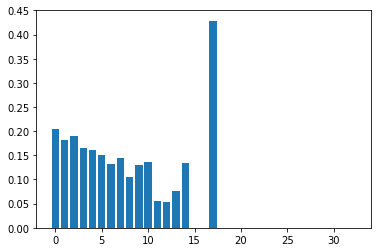

In [7]:
df_merge["age_diff"] = abs(df_merge["age_o_x"] - df_merge["age_x"])
grouped = df_merge.groupby("age_diff")
age_diff = grouped["match_x"].agg(np.average)
plt.bar(age_diff.index, age_diff)
plt.show()

In [8]:
#df_merge["age_diff"].value_counts()

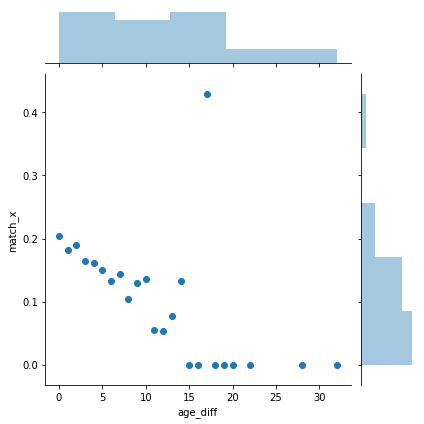

In [9]:
sns.jointplot(x=age_diff.index, y=age_diff, kind='scatter')

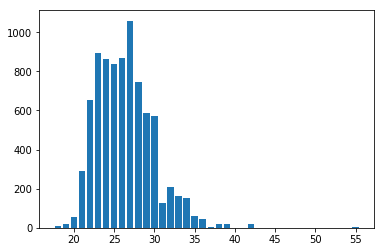

In [10]:
plt.bar(df["age"].value_counts().index, df["age"].value_counts())
plt.show()

In [11]:
df["age"].describe()
## <= 20, 20 - 24, 24 - 28, 28 - 35, >= 35

count    8283.000000
mean       26.358928
std         3.566763
min        18.000000
25%        24.000000
50%        26.000000
75%        28.000000
max        55.000000
Name: age, dtype: float64

In [12]:
def age_c(x):
    if (x <= 20):
        return 0
    elif x > 20 and x <= 24:
        return 1
    elif x > 24 and x <= 28:
        return 2
    elif x > 28 and x <= 35:
        return 3
    else:
        return 4
df["age_grouped"] = df["age"].apply(lambda x: age_c(x))
df["age_grouped"].value_counts()

2    3511
1    2703
3    1871
4     208
0      85
Name: age_grouped, dtype: int64

## Match Rate Among Different Goals

In [13]:
## map of zipcode
### add attributes into the decision tree
### relationship between the estimated number of matches and the true match rate
### whether a lawyer is looking for another lawyer
### people of different ages have different goals and whether they will match the rates

In [14]:
def goal_c(x):
    if (x == 1) or (x == 2):
        return 0
    elif (x == 3) or (x == 4):
        return 1
    else:
        return 2
df["goal_reduced"] = df["goal"].apply(lambda x: goal_c(x))

In [15]:
groupedGoal = df.groupby("goal")
goalAvg = groupedGoal["match"].agg(np.average)
goalAvg

goal
1.0    0.170169
2.0    0.160691
3.0    0.158479
4.0    0.169435
5.0    0.166667
6.0    0.147971
Name: match, dtype: float64

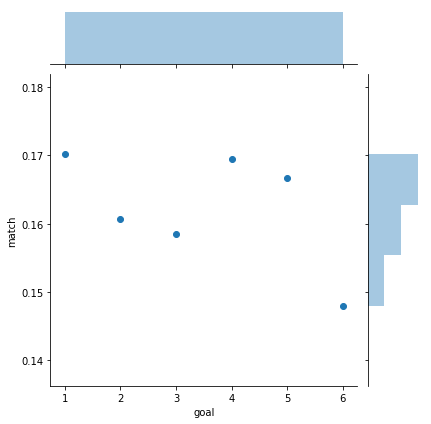

In [16]:
sns.jointplot(x=goalAvg.index, y=goalAvg, kind='scatter')

In [17]:
df["goal"].value_counts()

1.0    3426
2.0    3012
3.0     631
5.0     510
6.0     419
4.0     301
Name: goal, dtype: int64

In [18]:
## no one under age 20 ever chose serious relationship 
df_age1 = df.loc[df["age_grouped"] == 0,]
df_age1["goal"].value_counts()

2.0    30
1.0    30
5.0    25
Name: goal, dtype: int64

In [19]:
age_goal_0 = pd.DataFrame(columns = ["Goals", "<=20", "20-24", "24-28", "28-35", ">35"])
age_goal_0["Goals"] = pd.Series(["Goal 1: fun night out", "Goal 2: meet new people", 
                                    "Goal 3: get a date", "Goal 4: serious relationship",
                                    "Goal 5: say I did it", "Goal 6: Other"])
age_goal_1 = pd.DataFrame(columns = ["Goals", "<=20", "20-24", "24-28", "28-35", ">35"])
age_goal_1["Goals"] = pd.Series(["Goal 1: fun night out", "Goal 2: meet new people", 
                                    "Goal 3: get a date", "Goal 4: serious relationship",
                                    "Goal 5: say I did it", "Goal 6: Other"])

In [20]:
age1Goal0= df_age1.loc[df_age1["gender"] == 0,].goal.value_counts() / df_age1.loc[df_age1["gender"] == 0,].shape[0]
age1Goal1= df_age1.loc[df_age1["gender"] == 1,].goal.value_counts() / df_age1.loc[df_age1["gender"] == 1,].shape[0]
age_goal_0["<=20"] = pd.Series([0.5, 0.25, 0, 0, 0.25, 0])
age_goal_1["<=20"] = pd.Series([0.22, 0.44, 0, 0, 0.33, 0])

In [21]:
df_age2 = df.loc[df["age_grouped"] == 1,]
df_age2["goal"].value_counts()*1.0 / df_age2.shape[0]
age2Goal0= df_age2.loc[df_age2["gender"] == 0,].goal.value_counts() / df_age2.loc[df_age2["gender"] == 0,].shape[0]
age2Goal1= df_age2.loc[df_age2["gender"] == 1,].goal.value_counts() / df_age2.loc[df_age2["gender"] == 1,].shape[0]
age_goal_0["20-24"] = pd.Series([0.45, 0.41, 0.032, 0, 0.064, 0.05])
age_goal_1["20-24"] = pd.Series([0.48, 0.24, 0.12, 0.039, 0.052, 0.07])

In [22]:
df_age3 = df.loc[df["age_grouped"] == 2,]
df_age3["goal"].value_counts()*1.0 / df_age3.shape[0]
age3Goal0= df_age3.loc[df_age3["gender"] == 0,].goal.value_counts() / df_age3.loc[df_age3["gender"] == 0,].shape[0]
age3Goal1= df_age3.loc[df_age3["gender"] == 1,].goal.value_counts() / df_age3.loc[df_age3["gender"] == 1,].shape[0]
age_goal_0["24-28"] = pd.Series([0.47, 0.34, 0.060, 0.013, 0.076, 0.025])
age_goal_1["24-28"] = pd.Series([0.45, 0.31, 0.089, 0.025, 0.087, 0.044])

In [23]:
df_age4 = df.loc[df["age_grouped"] == 3,]
df_age4["goal"].value_counts()*1.0 / df_age4.shape[0]
age4Goal0= df_age4.loc[df_age4["gender"] == 0,].goal.value_counts() / df_age4.loc[df_age4["gender"] == 0,].shape[0]
age4Goal1= df_age4.loc[df_age4["gender"] == 1,].goal.value_counts() / df_age4.loc[df_age4["gender"] == 1,].shape[0]
age_goal_0["28-35"] = pd.Series([0.20, 0.50, 0.056, 0.011, 0.049, 0.080])
age_goal_1["28-35"] = pd.Series([0.32, 0.46, 0.11, 0.046, 0, 0.064])

In [24]:
df_age5 = df.loc[df["age_grouped"] == 4,]
df_age5["goal"].value_counts()*1.0 / df_age5.shape[0]
age5Goal0= df_age5.loc[df_age5["gender"] == 0,].goal.value_counts() / df_age5.loc[df_age5["gender"] == 0,].shape[0]
age5Goal1= df_age5.loc[df_age5["gender"] == 1,].goal.value_counts() / df_age5.loc[df_age5["gender"] == 1,].shape[0]
age_goal_0[">35"] = pd.Series([0.19, 0.24, 0, 0.14, 0, 0.052])
age_goal_1[">35"] = pd.Series([0.054, 0.22, 0.17, 0.34, 0, 0])

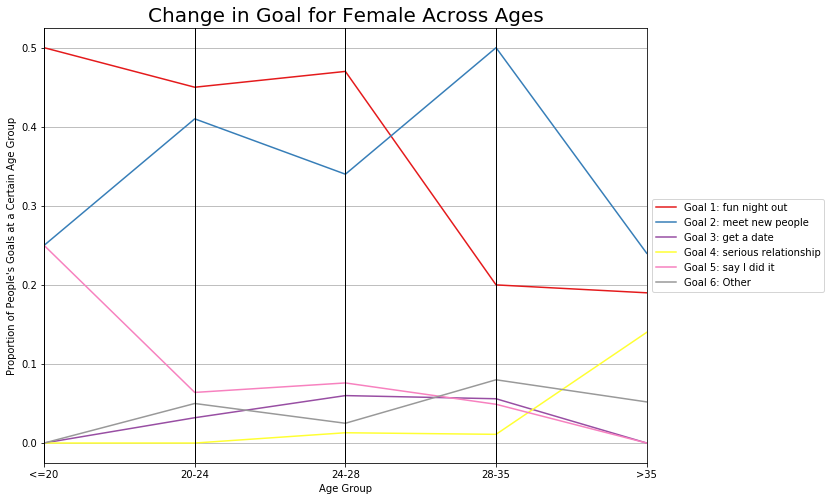

In [58]:
fig = plt.figure(1, figsize = (12, 8))
parallel_coordinates(age_goal_0, 'Goals', colormap=plt.get_cmap("Set1"))
ax = fig.gca()
ax.set_ylabel("Proportion of People's Goals at a Certain Age Group")
ax.set_xlabel("Age Group")
ax.set_title("Change in Goal for Female Across Ages", fontsize = 20)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

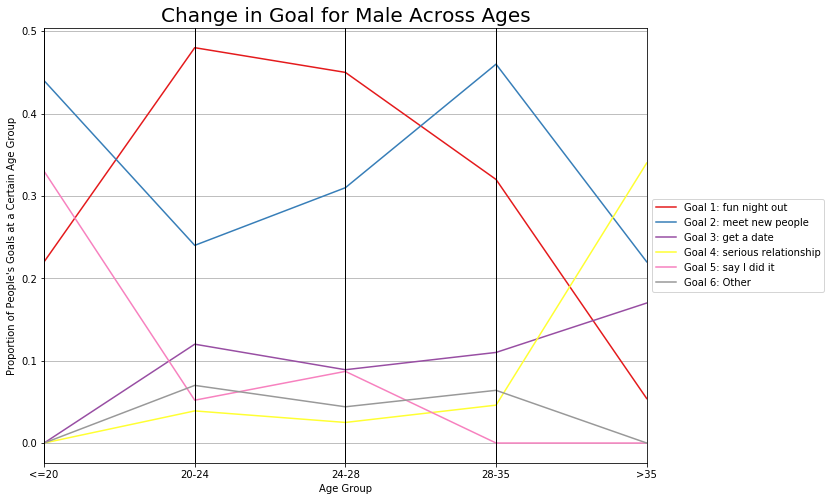

In [57]:
fig = plt.figure(1, figsize = (12, 8))
parallel_coordinates(age_goal_1, 'Goals', colormap=plt.get_cmap("Set1"))
ax = fig.gca()
ax.set_ylabel("Proportion of People's Goals at a Certain Age Group")
ax.set_xlabel("Age Group")
ax.set_title("Change in Goal for Male Across Ages", fontsize = 20)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
df_age1.groupby("goal")["match"].agg(np.average)

goal
1.0    0.433333
2.0    0.033333
5.0    0.200000
Name: match, dtype: float64

In [28]:
df_age2.groupby("goal")["match"].agg(np.average)

goal
1.0    0.169342
2.0    0.156319
3.0    0.110526
4.0    0.085106
5.0    0.177215
6.0    0.131250
Name: match, dtype: float64

In [29]:
df_age3.groupby("goal")["match"].agg(np.average)

goal
1.0    0.170068
2.0    0.184211
3.0    0.216730
4.0    0.417910
5.0    0.156794
6.0    0.198347
Name: match, dtype: float64

In [30]:
df_age4.groupby("goal")["match"].agg(np.average)

goal
1.0    0.164032
2.0    0.139013
3.0    0.111111
4.0    0.115108
5.0    0.175000
6.0    0.128788
Name: match, dtype: float64

In [31]:
df_age5.groupby("goal")["match"].agg(np.average)

goal
1.0    0.037037
2.0    0.166667
3.0    0.250000
4.0    0.062500
6.0    0.000000
Name: match, dtype: float64

In [32]:
df.groupby("age_grouped")["match"].agg(np.average)

age_grouped
0    0.223529
1    0.157603
2    0.182284
3    0.141635
4    0.144231
Name: match, dtype: float64

In [33]:
## young women have especially high match rates
df0 = df.loc[df.gender == 0, ]
df1 = df.loc[df.gender == 1, ]
print df0.groupby("age_grouped")["match"].agg(np.average)
print df1.groupby("age_grouped")["match"].agg(np.average)
## women have lower and lower match rates, while men go down and up

age_grouped
0    0.400000
1    0.152520
2    0.181925
3    0.145655
4    0.130435
Name: match, dtype: float64
age_grouped
0    0.066667
1    0.164017
2    0.182623
3    0.138520
4    0.161290
Name: match, dtype: float64


In [34]:
## most younger women (19, 20) matched with older men (21, 22)
df0.loc[df0.age_grouped == 0,][["age","age_o","match"]]

,age,age_o,match
1656,20.0,22.0,1
1657,20.0,18.0,0
1658,20.0,22.0,0
1659,20.0,21.0,1
1660,20.0,22.0,1
1661,20.0,22.0,1
1662,20.0,21.0,1
1663,20.0,NaN,1
1664,20.0,20.0,0
1665,20.0,19.0,0
